In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [47]:
dataset = pd.read_csv('SaYoPillow.csv')
dataset

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


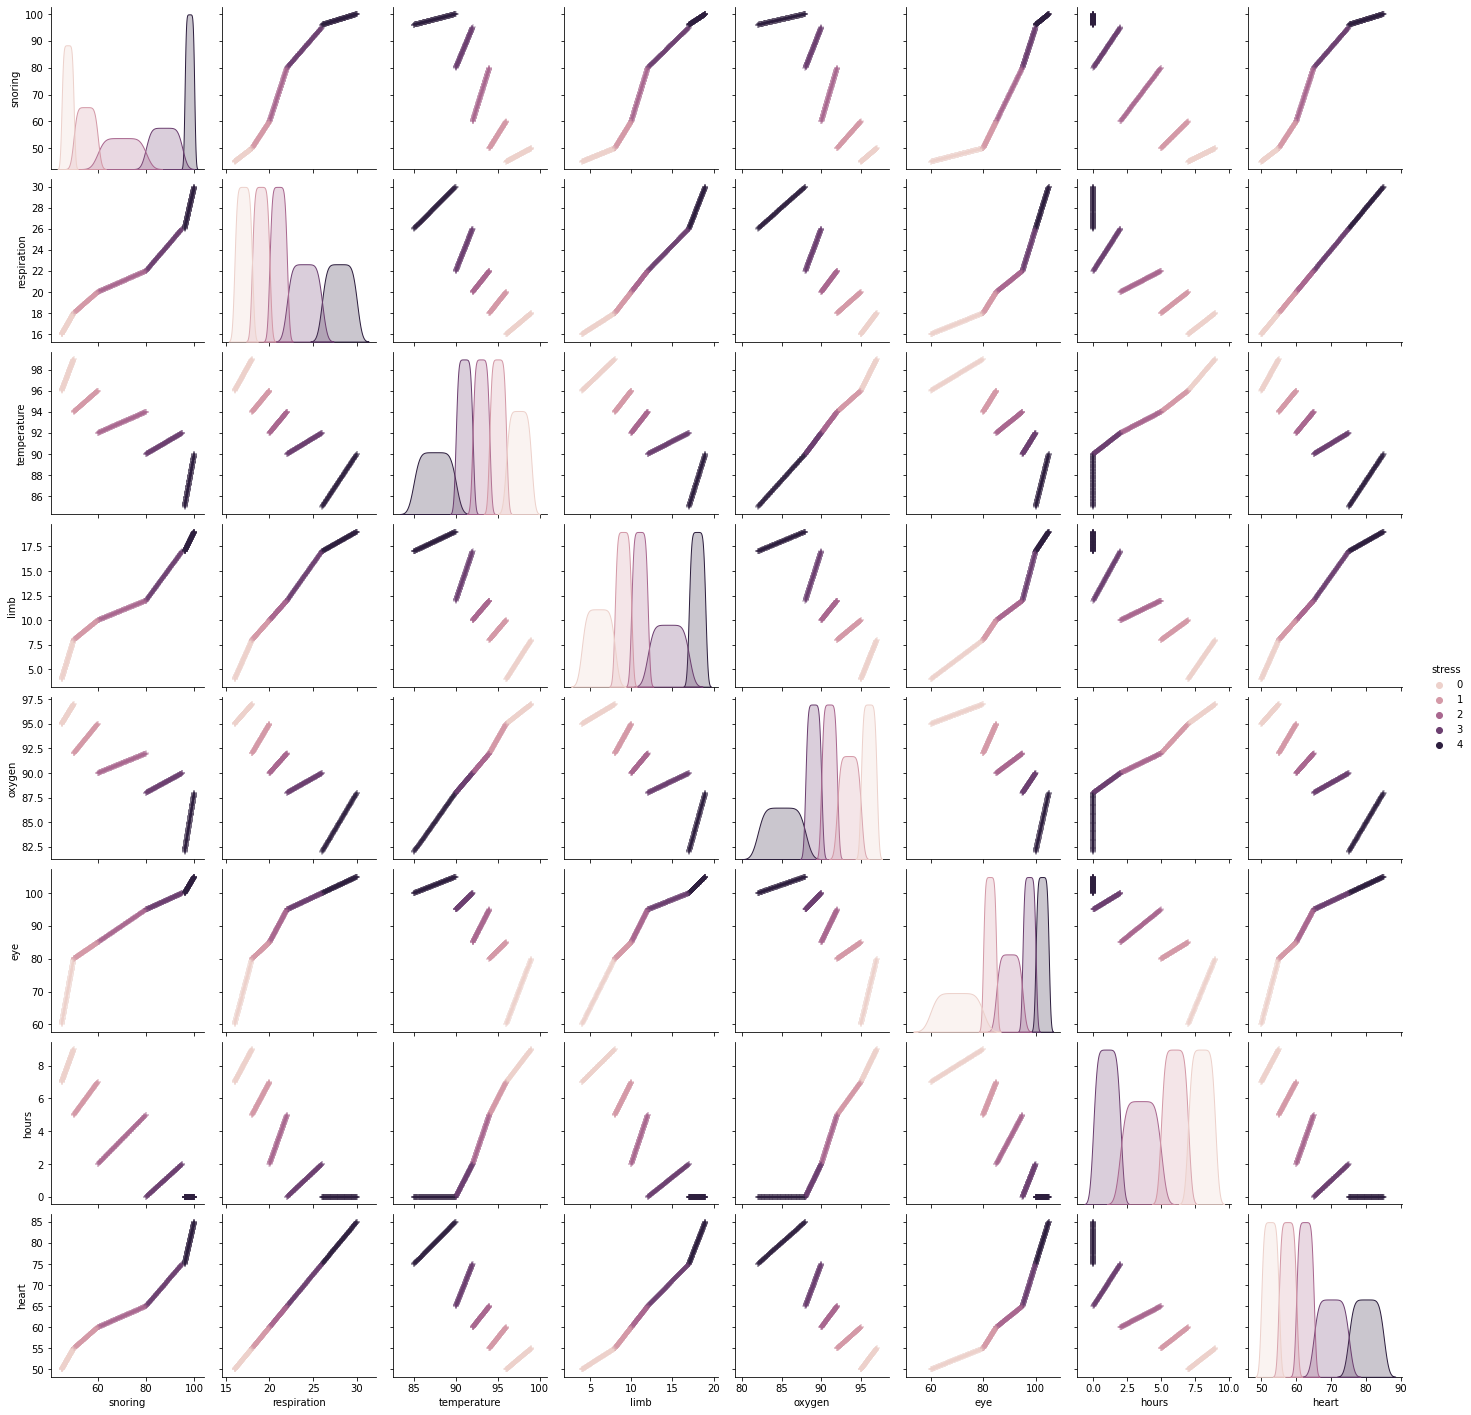

In [50]:
sns.pairplot(dataset, hue='stress', markers='+')

In [3]:
dataset.describe()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [4]:
#$$ Gauss $$#


In [5]:


#### ZNORMALIZOWANE ####

In [6]:
class DataProcessing:
    @staticmethod 
    def normalize(x):
        x=x.copy()
        values=x.select_dtypes(exclude="object")
        columnNames=values.columns.tolist()
        columnNames.remove("stress")
        for column in columnNames:
            data=x.loc[:,column]
            max1=max(data)
            min1=min(data)
            for row in range(len(x)):
                newValue=((x.at[row,column]-min1)/(max1-min1))
                x.at[row, column]=newValue
        return x
    
    @staticmethod
    def SplitData(X,x):
        #y to x'
        if x >= 10 or x < 0:
            raise ValueError('Złe x (musi < 1)')
        return X[:math.ceil(len(X)*x)],X[math.ceil(len(X)*(1-x)):]

In [7]:
pillowNorm=DataProcessing.normalize(dataset)

In [8]:
X = pillowNorm.iloc[:,:8].values
y = pillowNorm['stress'].values
pillowNorm.head()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


In [9]:
pillowNorm.describe()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.483636,0.414286,0.557143,0.513333,0.593333,0.633333,0.411111,0.414286,2.000000
std,0.352233,0.283294,0.252121,0.286642,0.260166,0.264305,0.339397,0.283294,1.415337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.178571,0.392857,0.300000,0.433333,0.472222,0.055556,0.178571,1.000000
50%,0.454545,0.357143,0.571429,0.466667,0.600000,0.666667,0.388889,0.357143,2.000000
75%,0.840909,0.642857,0.750000,0.783333,0.816667,0.861111,0.722222,0.642857,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = classifier.predict(X_test)

Accuracy :  100.0 %


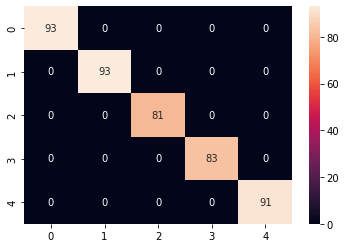

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
cm = confusion_matrix(y_test, y_pred)
accuracy1=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy1, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [15]:
from sklearn.metrics import make_scorer,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='macro')
recall =  recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [16]:


#### NIEZNORMALIZOWANE ####

In [17]:
X1 = dataset.iloc[:,:8].values
y1 = dataset['stress'].values
dataset.head()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.7)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy :  100.0 %


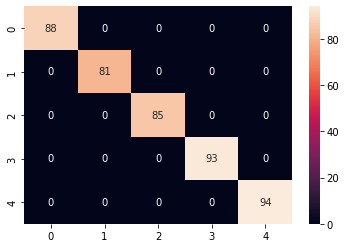

In [19]:
cm = confusion_matrix(y_test, y_pred)
accuracy2=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy2, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [20]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [21]:
#$$$$ Bernoulli $$$$#


In [22]:


#### ZNORMALIZOWANE ####

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy :  59.18 %


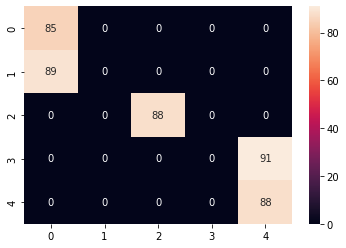

In [24]:
cm = confusion_matrix(y_test, y_pred)
accuracy3=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy3, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [45]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='weighted')
recall =  recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 0.576
precision_Naive Bayes: 0.378
recall_Naive Bayes: 0.576
f1-score_Naive Bayes : 0.442


C:\Users\Witam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:


#### NIEZNORMALIZOWANE ####

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.7)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy :  57.6 %


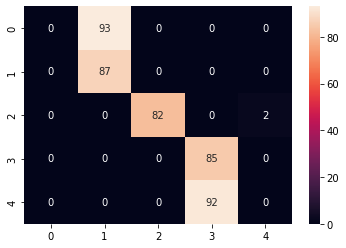

In [28]:
cm = confusion_matrix(y_test, y_pred)
accuracy4=round(accuracy_score(y_test, y_pred)*100 ,2)
print ("Accuracy : ", accuracy4, "%")
sns.heatmap(cm, annot=True)
plt.show()

In [46]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='weighted')
recall =  recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 0.576
precision_Naive Bayes: 0.378
recall_Naive Bayes: 0.576
f1-score_Naive Bayes : 0.442


C:\Users\Witam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#### Bayes z kolowkium - nienazwany

In [31]:


#### NIEZNORMALIZOWANE ####

In [32]:
class NaiveBayes:
    #srednia
    @staticmethod
    def mean(attr):
        try:
            return sum(attr)/len(attr)
        except TypeError:
            print(attr)
            return sum(attr)/len(attr)
        
    #odch stand
    def std(attr):
        mean = NaiveBayes.mean(attr)
        sumelem = 0
        for i in attr:
            sumelem += (i-mean)**2
        return math.sqrt(sumelem/len(attr))
    
    #funkcja
    @staticmethod
    def fun(x, mean, std):
        if mean-math.sqrt(6)*std<=x and x<=std:
            a = x-mean/6*std**2 + 1/math.sqrt(6)*std
        elif mean<x and x<=mean+math.sqrt(6)*std:
            a = -(x-mean/6*std**2) + 1/math.sqrt(6)*std
        else:
            a=0
        return a
    
    #klasyfikacja
    def classify(train,sample):
        #separacja klas z bazy X
        names = train.stress.unique()
        classes = []
        for name in names:
            classes += [train[train['stress'] == name]]
            del classes[-1]['stress']
        #obl sred i odch dla kazdego atrybutu i klasy
        #obl skladowych prawdopodobienstw
        classes_fun = []
        for classy in classes:
            attrs_mean = []
            attrs_std = []
            attrs_fun = []
            for (name, data) in classy.iteritems():
                attrs_mean += [NaiveBayes.mean(data.values)]
                attrs_std += [NaiveBayes.std(data.values)]
                attrs_fun += [NaiveBayes.fun(sample[name],attrs_mean[-1],attrs_std[-1])]
            classes_fun += [np.prod(attrs_fun)]
        return names[classes_fun.index(max(classes_fun))]

In [33]:
dataset = pd.read_csv('SaYoPillow.csv')
X_train, X_test = DataProcessing.SplitData(dataset,0.7)
correct = 0
for i in range(0,len(X_test)):
    sample = X_test.iloc[i].drop('stress').to_dict()
    if X_test.iloc[i].stress == NaiveBayes.classify(X_train,sample):
        correct += 1
accuracy = correct/len(X_train.index)*100
accuracy5=round(accuracy,2)
print("Accuracy (regul) -",accuracy5,"%")

Accuracy (regul) - 31.52 %


In [34]:


#### ZNORMALIZOWANE ####

In [35]:
dataset = pd.read_csv('SaYoPillow.csv')
datasetnorm = DataProcessing.normalize(dataset)
X_train, X_test = DataProcessing.SplitData(datasetnorm,0.7)
correct = 0
for i in range(0,len(X_test)):
    sample = X_test.iloc[i].drop('stress').to_dict()
    if X_test.iloc[i].stress == NaiveBayes.classify(X_train,sample):
        correct += 1
accuracy = correct/len(X_train.index)*100
accuracy6=round(accuracy,2)
print("Accuracy (regul) -",accuracy6,"%")

Accuracy (regul) - 51.02 %


In [36]:
# Bayes zaimplementowany

In [37]:


#### NIEZNORMALIZOWANE ####

In [38]:
class NaiveBayes2:
    @staticmethod
    def mean(attr):
        try:
            return sum(attr)/len(attr)
        except TypeError:
            print(attr)
            return sum(attr)/len(attr)
        
    def std(attr):
        mean = NaiveBayes.mean(attr)
        sumelem = 0
        for i in attr:
            sumelem += (i-mean)**2
        return math.sqrt(sumelem/len(attr))
    
    @staticmethod
    def fun2(x, mean, std):
        exponet = np.exp(-(x - mean) ** 2 / (2 * std ** 2))
        return 1 / np.sqrt(2 * np.pi * std ** 2) * exponet
    
    def classify(train,sample):
        names = train.stress.unique()
        classes = []
        for name in names:
            classes += [train[train['stress'] == name]]
            del classes[-1]['stress']
 
        classes_fun = []
        for classy in classes:
            attrs_mean = []
            attrs_std = []
            attrs_fun = []
            for (name, data) in classy.iteritems():
                attrs_mean += [NaiveBayes2.mean(data.values)]
                attrs_std += [NaiveBayes2.std(data.values)]
                attrs_fun += [NaiveBayes2.fun2(sample[name],attrs_mean[-1],attrs_std[-1])]
            classes_fun += [np.prod(attrs_fun)]
        return names[classes_fun.index(max(classes_fun))]

In [39]:
dataset = pd.read_csv('SaYoPillow.csv')
X_train, X_test = DataProcessing.SplitData(dataset,0.7)
correct = 0
for i in range(0,len(X_test)):
    sample = X_test.iloc[i].drop('stress').to_dict()
    if X_test.iloc[i].stress == NaiveBayes2.classify(X_train,sample):
        correct += 1
accuracy = correct/len(X_train.index)*100
accuracy7=round(accuracy,2)
print("Accuracy (regul) -",accuracy7,"%")

C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  exponet = np.exp(-(x - mean) ** 2 / (2 * std ** 2))
C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(2 * np.pi * std ** 2) * exponet
C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / np.sqrt(2 * np.pi * std ** 2) * exponet
C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:21: RuntimeWarning: invalid value encountered in double_scalars
  exponet = np.exp(-(x - mean) ** 2 / (2 * std ** 2))


Accuracy (regul) - 80.5 %


In [40]:


#### ZNORMALIZOWANE ####

In [41]:
dataset = pd.read_csv('SaYoPillow.csv')
datasetnorm = DataProcessing.normalize(dataset)
X_train, X_test = DataProcessing.SplitData(datasetnorm,0.7)
correct = 0
for i in range(0,len(X_test)):
    sample = X_test.iloc[i].drop('stress').to_dict()
    if X_test.iloc[i].stress == NaiveBayes2.classify(X_train,sample):
        correct += 1
accuracy = correct/len(X_train.index)*100
accuracy8=round(accuracy,2)
print("Accuracy (regul) -",accuracy8,"%")

C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  exponet = np.exp(-(x - mean) ** 2 / (2 * std ** 2))
C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(2 * np.pi * std ** 2) * exponet
C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / np.sqrt(2 * np.pi * std ** 2) * exponet
C:\Users\Witam\AppData\Local\Temp/ipykernel_9588/4145610756.py:21: RuntimeWarning: invalid value encountered in double_scalars
  exponet = np.exp(-(x - mean) ** 2 / (2 * std ** 2))


Accuracy (regul) - 80.5 %


In [42]:
# Porownywanie modeli

In [43]:
results = pd.DataFrame({
   'Model': [ 'Gauss_z_bibl_n', 
              'Gauss_z_bibl', 
              'Bernoulli_n',
              'Bernoulli',  
              'Beznazwowy', 
              'Beznazwowy_n', 
              'Gauss_wlasny',
              'Gauss_wlasny_n'],
    "Accuracy_score":[accuracy1,
                      accuracy2,
                      accuracy3,
                      accuracy4,
                      accuracy5,
                      accuracy6,
                      accuracy7,
                      accuracy8
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Accuracy_score
0,Gauss_z_bibl_n,100.00
1,Gauss_z_bibl,100.00
2,Gauss_wlasny,80.50
3,Gauss_wlasny_n,80.50
4,Bernoulli_n,59.18
5,Bernoulli,57.60
6,Beznazwowy_n,51.02
7,Beznazwowy,31.52


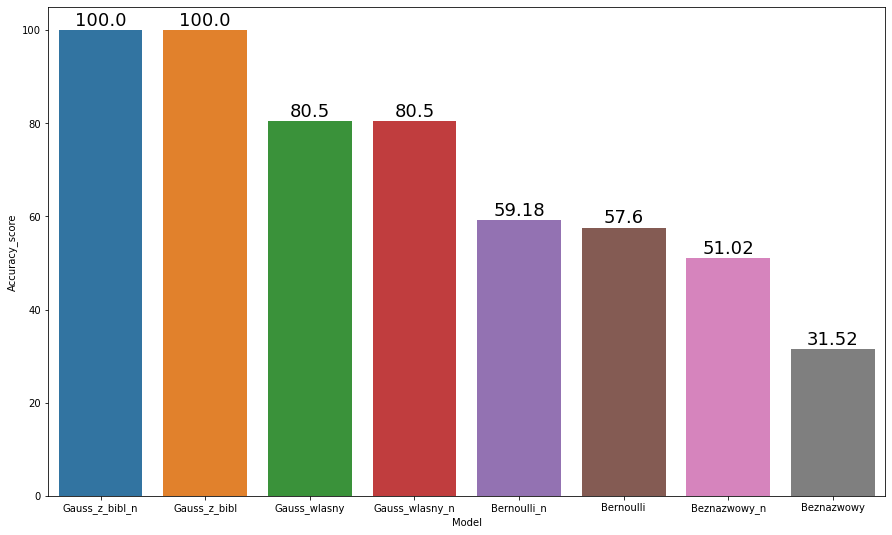

In [44]:
plt.subplots(figsize=(15,9))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
 #add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 18, color = 'black')